In [1]:
import pandas as pd

data_cl = pd.read_pickle("results/final-heart-local_data.p")
explanation_cl = pd.read_pickle("results/final-heart-local_explanation.p")
losses_cl = pd.read_pickle("results/final-heart-local_losses.p")
data_cl.to_csv("results/final-heart-local_data.csv", index=False)
pd.DataFrame(explanation_cl).to_csv("results/final-heart-local_explanation.csv", index=False)
pd.DataFrame(losses_cl).to_csv("results/final-heart-local_losses.csv", index=False)

In [2]:
from scipy import stats
stats.kendalltau([0, 1, 2, 3, 4, 5], [0, 2, 3, 4, 1, 5])

KendalltauResult(correlation=0.6, pvalue=0.1361111111111111)

In [6]:
(1 - stats.kendalltau([0, 1, 2, 3, 4, 5], [0, 2, 3, 4, 1, 5]).correlation) / 2 # kendall tau distance (normalized)

0.2

In [1]:
import pandas as pd

data_rg = pd.read_pickle("results/final-apartment-global_data.p")
explanation_rg = pd.read_pickle("results/final-apartment-global_explanation.p")
losses_rg = pd.read_pickle("results/final-apartment-global_losses.p")
data_rg.to_csv("results/final-apartment-global_data.csv", index=False)
pd.DataFrame(explanation_rg).to_csv("results/final-apartment-global_explanation.csv", index=False)
pd.DataFrame(losses_rg).to_csv("results/final-apartment-global_losses.csv", index=False)

In [2]:
from scipy import stats
stats.kendalltau([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 4, 3, 5, 7, 6])

KendalltauResult(correlation=0.8571428571428571, pvalue=0.001736111111111111)

In [7]:
(1 - stats.kendalltau([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 4, 3, 5, 7, 6]).correlation) / 2 # kendall tau distance (normalized)

0.07142857142857145

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["legend.handlelength"] = 0.1
_colors = ["#4378bf", "#f05a71"]
_df = data_rg
_df.columns = ["x"+str(i) for i in range(1, 6)] + ["dataset"]
ax = sns.pairplot(_df, hue='dataset', height=2, palette=_colors)
ax._legend.set_bbox_to_anchor((0.595, 0.57))
plt.show()

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["legend.handlelength"] = 0.1
_colors = ["#4378bf", "#f05a71"]
_df = data_cl
_df.columns = ["x"+str(i) for i in range(1, 5)] + ["dataset"]
ax = sns.pairplot(_df, hue='dataset', height=2, palette=_colors)
ax._legend.set_bbox_to_anchor((0.595, 0.49))
plt.show()

## Intuition https://github.com/scipy/scipy/issues/7089

In [76]:
explanation_cl = pd.read_pickle("results/final-heart-local_explanation.p")
explanation_cl

{'original': array([ 0.13234342, -0.00347919,  0.0789294 ,  0.11733973, -0.04085725,
         0.18711245]),
 'changed': array([ 0.07221443, -0.04442396,  0.12214721,  0.15877014, -0.08531101,
         0.22907255]),
 'target': array([-0.005     , -0.04759366,  0.12304387,  0.1614542 , -0.08497172,
         0.23122693])}

Pearson's r correlation coefficient: 0.80
Kendall's tau correlation coefficient: 0.60


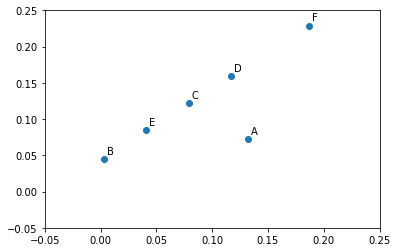

In [77]:
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, pearsonr
import numpy as np

def plot_data(x, y, labels):
    plt.scatter(x, y)
    for xi, yi, lab in zip(x, y, labels):
        plt.annotate(lab, (xi, yi), xytext=(3, 3), textcoords="offset points", ha='left', va='bottom')
    # plt.axis([-1, 6, -1, 6])
    plt.axis([-0.05, 0.25, -0.05, 0.25])

labels = ['A', 'B', 'C', 'D', 'E', 'F']

# x = [0, 1, 2, 3, 4, 5]
# y = [0, 2, 3, 4, 1, 5]

x = np.abs(explanation_cl['original'])
y = np.abs(explanation_cl['changed'])

print("Pearson\'s r correlation coefficient: {:.2f}".format(pearsonr(x, y)[0]))
print("Kendall\'s tau correlation coefficient: {:.2f}".format(kendalltau(x, y)[0]))
plot_data(x, y, labels)